Sample Size: 420
Test Score Mean: 654.156548055013
Test Score Median: 654.4499816894536
Test Score Std Dev: 19.053347643618803
STRatio Mean: 19.64042526199704
STRatio Median: 19.7232084274292
STRatio Std Dev: 1.8918117872336768


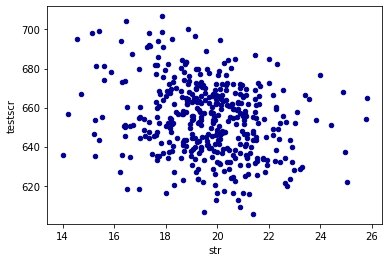

In [1]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from scipy import stats

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import ast
import random
import math 
import time
import sys 

df = pd.read_csv('Caschool.csv', encoding='latin-1')

print("Sample Size:", len(df))
print("Test Score Mean:", df["testscr"].mean())
print("Test Score Median:",df["testscr"].median())
print("Test Score Std Dev:",df["testscr"].std())

print("STRatio Mean:", df["str"].mean())
print("STRatio Median:",df["str"].median())
print("STRatio Std Dev:",df["str"].std())

ax1 = df.plot.scatter(x='str', y='testscr', c='DarkBlue')




In [2]:
small = df[df["str"]<20]
large = df[df["str"]>=20]

print("Small Sample Size:", len(small))
print("Small Test Score Mean:", small["testscr"].mean())
print("Small Test Score Median:",small["testscr"].median())
print("Small Test Score Std Dev:",small["testscr"].std())


print("Large Sample Size:", len(large))
print("Large Test Score Mean:", large["testscr"].mean())
print("Large Test Score Median:",large["testscr"].median())
print("Large Test Score Std Dev:",large["testscr"].std())


Difference = small["testscr"].mean()-large["testscr"].mean()
print("Score Difference:", Difference)

Small Sample Size: 238
Small Test Score Mean: 657.3512591193704
Small Test Score Median: 656.5250244140625
Small Test Score Std Dev: 19.35801231114866
Large Sample Size: 182
Large Test Score Mean: 649.9788489708534
Large Test Score Median: 651.625030517578
Large Test Score Std Dev: 17.853363795805546
Score Difference: 7.3724101485170195


In [3]:
#Two-Sample T-Test

print(stats.ttest_ind(a= small["testscr"],
                b= large["testscr"],
                equal_var=False))    # Assume samples have equal variance?



Ttest_indResult(statistic=4.042581848666623, pvalue=6.332554425241345e-05)


In [4]:
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value* 

print("z-critical value:", z_critical)              # Check the z-critical value

#margin_of_error = z_critical * stats.sem(Weight)

StandardError = math.sqrt(small["testscr"].std()**2/len(small)+large["testscr"].std()**2/len(large))

print("StandardError:", StandardError) 

margin_of_error = z_critical * StandardError



confidence_interval = (Difference - margin_of_error,
                       Difference + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value: 1.959963984540054
StandardError: 1.8236885298807022
Confidence interval:
(3.798046310932045, 10.946773986101995)
